# Reinforcement learning: The 10-armed bandit
(version by **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**)

Code to implement the 10-armed bandit seen in section 2.3 of the book ["Reinforcement Learning: An Introduction"](http://www.incompleteideas.net/book/RLbook2020.pdf) by Richard S. Sutton and Andrew G. Barto.

In [1]:
import numpy as np
#np.random.seed(42)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (20,5)
#plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set(font_scale=1.5)

In [2]:
# game parameters
n_arms = 10
epsilons = [0, 0.01, 0.2]
n_steps = 1500
n_plays = 2500

# set up an array to store the results
stored_data = np.zeros((len(epsilons), n_plays, n_steps))

mu = 0
sigma = 1

In [3]:
for epsilon_index, epsilon in enumerate(epsilons):
    print("Running Epsilon",epsilon)
    for i in range(n_plays):
        # reset for each play
        Q_sum = np.zeros(n_arms)
        Q_pulls = np.ones(n_arms)
        Q_estimate = np.zeros(n_arms)
        # randomly set up the mu's and sigma for each arm
        Q_true = np.random.normal(mu, sigma, n_arms)

        for j in range(n_steps):
            # exploitation: calculate a random reward for the "best" arm
            arm = np.argmax(Q_estimate)
            reward = np.random.normal(Q_true[arm], sigma)

            # exploration: randomly try out a new arm
            pull = np.random.uniform(low=0.0, high=1.0)
            if pull < epsilon: # choose another arm to try
                # randomly choose which arm to pull
                arm = np.random.randint(0, high=n_arms)
                # calculate a reward for this new arm
                reward = np.random.normal(Q_true[arm], sigma)

            # save the value of the reward
            stored_data[epsilon_index,i,j] = reward

            # update the Q_estimates
            Q_sum[arm] += reward  # value
            Q_pulls[arm] += 1 # action
            Q_estimate[arm] = Q_sum[arm] / Q_pulls[arm]

results = np.mean(stored_data, axis=1)

Running Epsilon 0
Running Epsilon 0.01
Running Epsilon 0.2


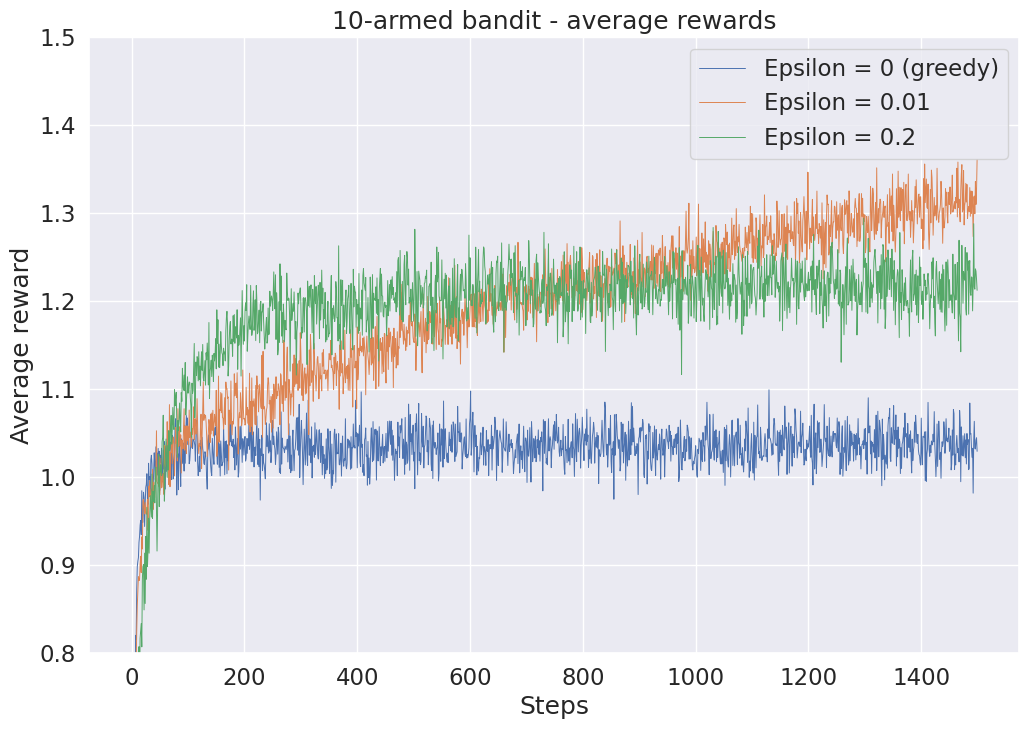

In [4]:
fig = plt.figure(figsize = (12, 8))
plt.title("10-armed bandit - average rewards")
plt.plot(results.T[:,0], lw=0.7, label = "Epsilon = 0 (greedy)")
plt.plot(results.T[:,1], lw=0.7, label = "Epsilon = 0.01")
plt.plot(results.T[:,2], lw=0.7, label = "Epsilon = 0.2")
plt.ylabel('Average reward')
plt.xlabel('Steps')
plt.legend()
plt.ylim([0.8, 1.5])
plt.show()